<a href="https://colab.research.google.com/github/ia35/deeplearning4coders/blob/master/1_A_Geron_13_convolutional_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ce code commente un extrait du code de A. Geron, disponible sur [GitHub](https://github.com/ageron/handson-ml2/blob/master/14_deep_computer_vision_with_cnns.ipynb)

A. Geron est l'auteur d'un très bon livre sur le Machine Learning : [Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

Le chapitre concerné est le 14 :  Deep Computer Vision Using Convolutional Neural Networks, § Convolutional Layer



Puisqu'on est dans l'environnement GCP (Google Colab) et que par défaut, à la date de création de ce Notebook, la version de référence de TensorFlow n'est pas la 2, alors il faut commencer par intaller la version voulue

In [0]:
!pip install -q tensorflow==2.0.0-alpha0
import tensorflow as tf

On s'assure d'avoir la bonne version de tf

In [0]:
assert tf.__version__ >= "2.0"

Les données sont obtenues à partir de sklearn

maptplotib et numpy sont presque des must have en machine learning

In [0]:
import numpy as np
from sklearn.datasets import load_sample_image

In [0]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [0]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

On divise par 255 pour obtenir des floats

In [0]:
china = load_sample_image("china.jpg")/ 255
flower = load_sample_image("flower.jpg")/ 255

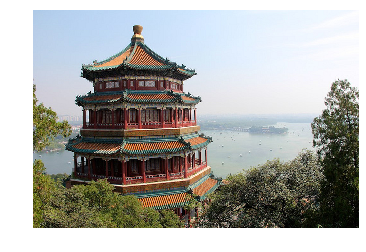

In [28]:
plot_image(china)

In [29]:
china.dtype

dtype('float64')

Chaque image est sur 3 plans (R, V, B)

In [31]:
china.shape

(427, 640, 3)

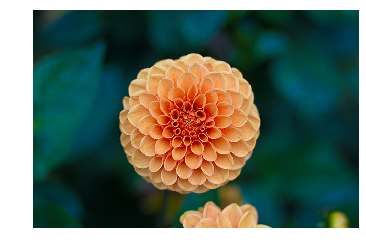

In [32]:
plot_image(flower)

In [33]:
flower.shape

(427, 640, 3)

On crée un tableau d'images 
images : input mini batch

In [0]:
images = np.array([china, flower])

In [36]:
images.shape

(2, 427, 640, 3)

In [0]:
batch_size, height, width, channels = images.shape

In [0]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32) 
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

In [16]:
filters.shape

(7, 7, 3, 2)

Regardons à quoi ressemble filters

Pour le 1er filtre 

In [45]:
filters[:, :, 0, 0]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

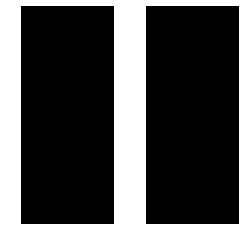

In [53]:
plot_image(filters[:, :, 0, 0])

Le 2nd filtre

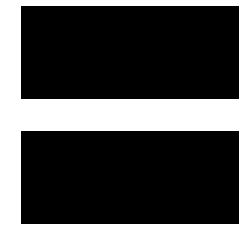

In [54]:
plot_image(filters[:, :, 0, 1])

strides peut avoir 2 valeurs : 1 comme ici ou [1,1,1,1]

Il y a 2 options pour le padding : 
padding: A string from: "SAME", "VALID". The type of padding algorithm to use.

Padding (P): the [padding](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/core/framework/common_shape_fns.h) we apply to the input tensor along each dimension. This is usually used to make sure that the spatial dimensions do not shrink when we progress with convolutions.

This function supports two types of padding.
- SAME: the pad value is computed so that the output will have size H/S.
- VALID: no padding is carried out.


In [0]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

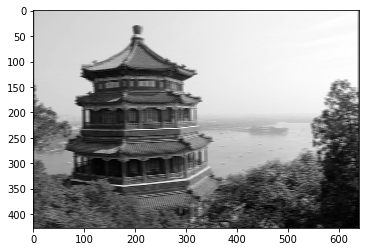

In [58]:
plt.imshow(outputs[0, :, :, 1], cmap="gray")

In [0]:
plt.show()